In [ ]:
%pip install rocketpy
%load_ext autoreload

# Project Name: Simulation of 1 kilogram rocket

contributer: Rajeev singh sisodiya

Project details:
Simulating a 1 kilogram rocket can be a fun and educational exercise. To create a basic rocket simulation, you'll need to consider factors such as thrust, mass, drag, and gravity. Here's a simplified example of how you can simulate the motion of a 1-kilogram rocket:

Define the Initial Parameters:
Mass of the rocket (m): 1 kg
Initial velocity (v0): 0 m/s
Thrust force (F_thrust): This depends on the rocket engine you're using. For simplicity, you can assume a constant thrust for the simulation.
Drag force (F_drag): This depends on the rocket's shape and aerodynamics. You can use a simplified model or lookup drag coefficients for common rocket shapes.
Gravitational acceleration (g): Approximately 9.81 m/s² (on Earth's surface).
Set Up the Simulation Loop:
You can use a programming language like Python to create a simulation loop that updates the rocket's position and velocity over time.

In [2]:
# Import necessary libraries and modules
import pathlib
from rocketpy import Environment, SolidMotor, Rocket, Flight
import datetime
import copy


In [8]:
# Define environmental conditions for the launch
env = Environment(latitude=40.4237, longitude=-86.9212, elevation=190)


Gravity Details

Acceleration of Gravity at Lauch Site: 9.80141790004194 m/s²


Launch Site Details

Launch Date: 2023-11-06 12:00:00 UTC
Launch Site Latitude: 40.42370°
Launch Site Longitude: -86.92120°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: -2437.11 W    4491652.85 N
Launch Site UTM zone: 17T
Launch Site Surface Elevation: 212.9 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.603 km
Forecast Time Period: From  2023-11-05 12:00:00  to  2023-11-21 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 9.95 m/s
Surface Wind Direction: 188.65°
Surface Wind Heading: 8.65°
Surface Pressure: 986.48 hPa
Surface Temperature: 283.38 K
Surface Air Density: 1.213 kg/m³
Surface Speed of Sound: 337.46 m/s


Atmospheric Model Plots



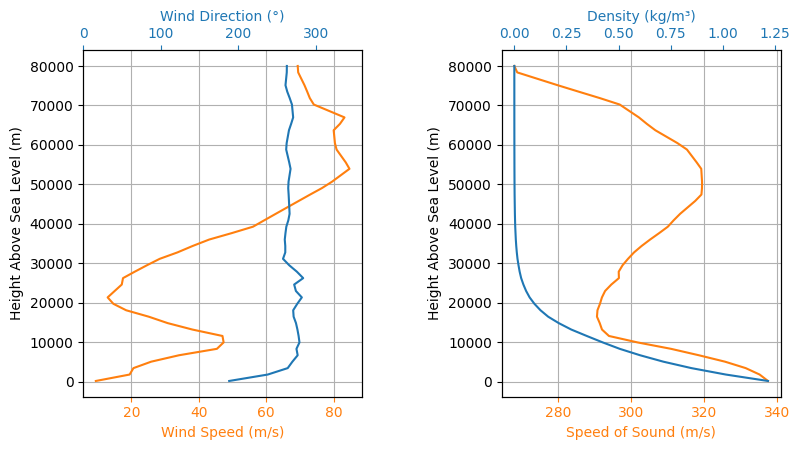

None


In [9]:
# Get tomorrow's date
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

# Set the environment's date to tomorrow at 12:00 UTC
env.set_date(
    (2023, 11, 6, 12)#tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

# Set the atmospheric model to be used, based on a forecast file
env.set_atmospheric_model(type="Forecast", file="GFS")

# Uncomment to print environment information
print(env.info())

In [10]:
# Create a solid motor object with specified properties and data file
DMS_H100W_14A = SolidMotor(
    thrust_source=fileLoc + "/DMS_H100W_14A.csv",
    #thrust_source=120,
    dry_mass=.154,
    dry_inertia=(0.0125, 0.0125, 0.0002),
    nozzle_radius=10.5 / 2 / 1000,
    grain_number=1,
    grain_density=1820.26,
    grain_outer_radius=33/ 2 / 1000,
    grain_initial_inner_radius=22 / 2 / 1000,
    grain_initial_height=140 / 1000,
    grain_separation=0 / 1000,
    grains_center_of_mass_position=0.076,
    center_of_dry_mass_position=0.076,
    nozzle_position=0,
    burn_time=2.4,
    throat_radius=5 / 2 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)
deploy_charge_time = 15

In [11]:
# Resolve the current directory path and convert it to a string
fileLoc = str(pathlib.Path().resolve())

Nozzle Details
Nozzle Radius: 0.00525 m
Nozzle Throat Radius: 0.0025 m

Grain Details
Number of Grains: 1
Grain Spacing: 0.0 m
Grain Density: 1820.26 kg/m3
Grain Outer Radius: 0.0165 m
Grain Inner Radius: 0.011 m
Grain Height: 0.14 m
Grain Volume: 0.000 m3
Grain Mass: 0.121 kg

Motor Details
Total Burning Time: 2.4 s
Total Propellant Mass: 0.121 kg
Average Propellant Exhaust Velocity: 1852.003 m/s
Average Thrust: 93.441 N
Maximum Thrust: 146.77199265811922 N at 0.6859999999999999 s after ignition.
Total Impulse: 224.258 Ns



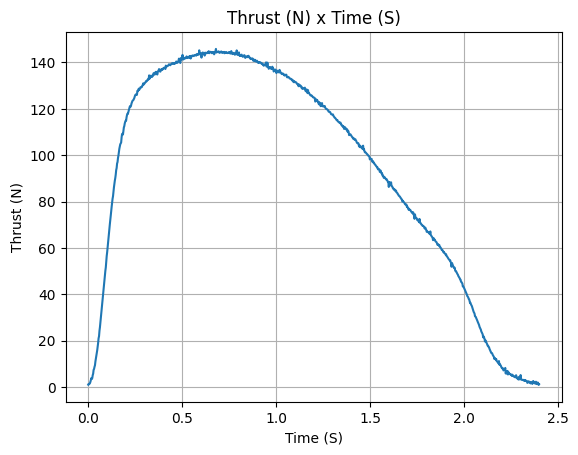

None


In [12]:
print(DMS_H100W_14A.info())

Nozzle Details
Nozzle Radius: 0.00525 m
Nozzle Throat Radius: 0.0025 m

Grain Details
Number of Grains: 1
Grain Spacing: 0.0 m
Grain Density: 1820.26 kg/m3
Grain Outer Radius: 0.0165 m
Grain Inner Radius: 0.011 m
Grain Height: 0.14 m
Grain Volume: 0.000 m3
Grain Mass: 0.121 kg

Motor Details
Total Burning Time: 2.4 s
Total Propellant Mass: 0.121 kg
Average Propellant Exhaust Velocity: 1852.003 m/s
Average Thrust: 93.441 N
Maximum Thrust: 146.77199265811922 N at 0.6859999999999999 s after ignition.
Total Impulse: 224.258 Ns



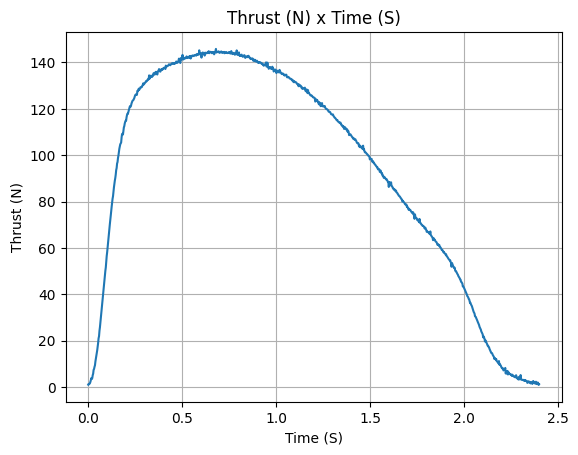

None


In [13]:
# Uncomment to print motor information
print(DMS_H100W_14A.info())

In [14]:
# Create a rocket object with specified properties and drag curves
loc_iv = Rocket(
    radius=10.2/100/2,
    mass=1.022,
    inertia=(.11675, .11675, .0028950),
    power_off_drag=fileLoc + "//PowerOff.csv",
    power_on_drag=fileLoc + "//PowerOn.csv",
    center_of_mass_without_motor=0.76,
    coordinate_system_orientation="nose_to_tail",
)

In [15]:
# Add the solid motor to the rocket at a specified position
loc_iv.add_motor(DMS_H100W_14A, position=1.19)


In [16]:
# Set the positions of the rail buttons on the rocket
rail_buttons = loc_iv.set_rail_buttons(
    upper_button_position=0.6418,
    lower_button_position=1.0182,
    angular_position=45,
)

In [17]:
# Add a nose cone to the rocket
nose_cone = loc_iv.add_nose(
    length=0.325, kind="ogive", position=0
)


In [19]:
airfoil=(fileLoc + "/content/DMS_H100W_14A.csv","radians")

In [18]:
# Add a set of trapezoidal fins to the rocket
fin_set = loc_iv.add_trapezoidal_fins(
    n=3,
    root_chord=0.171,
    tip_chord=0.063,
    span=0.1080,
    position=1.02,
    cant_angle=0,
    sweep_length=0.143
    #airfoil=(fileLoc + "/content/DMS_H100W_14A.csv","radians"),
)


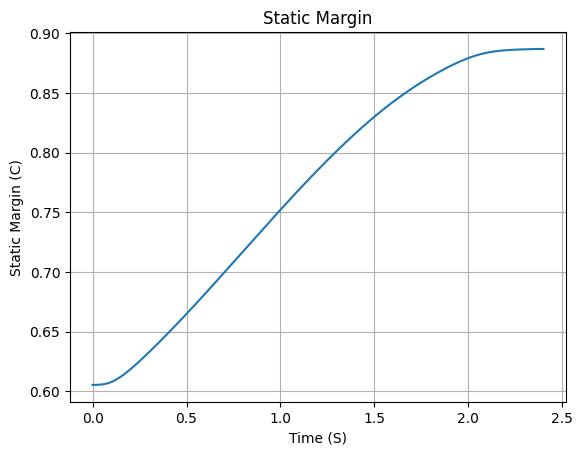

None


In [20]:
print(loc_iv.plots.static_margin())




Inertia Details

Rocket Mass: 1.022 kg
Rocket Dry Mass: 1.176 kg (With Motor)
Rocket Mass: 1.297 kg (With Propellant)
Rocket Inertia (with motor, but without propellant) 11: 0.146 kg*m2
Rocket Inertia (with motor, but without propellant) 22: 0.146 kg*m2
Rocket Inertia (with motor, but without propellant) 33: 0.003 kg*m2
Rocket Inertia (with motor, but without propellant) 12: 0.000 kg*m2
Rocket Inertia (with motor, but without propellant) 13: 0.000 kg*m2
Rocket Inertia (with motor, but without propellant) 23: 0.000 kg*m2


Geometrical Parameters

Rocket Maximum Radius: 0.051 m
Rocket Frontal Area: 0.008171 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass withour Motor: 0.046 m
Rocket Center of Dry Mass - Nozzle Exit Distance: 0.384 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.308 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.029 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient 

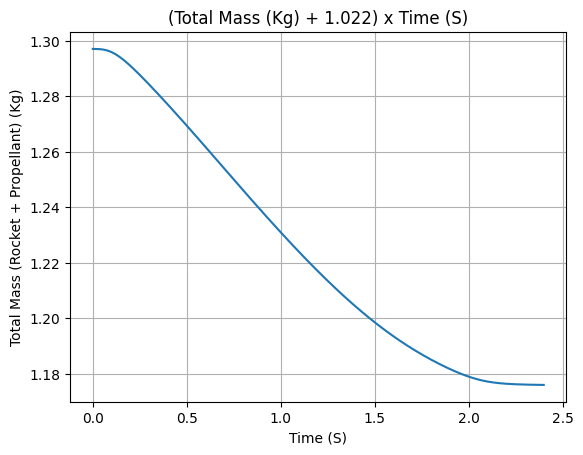

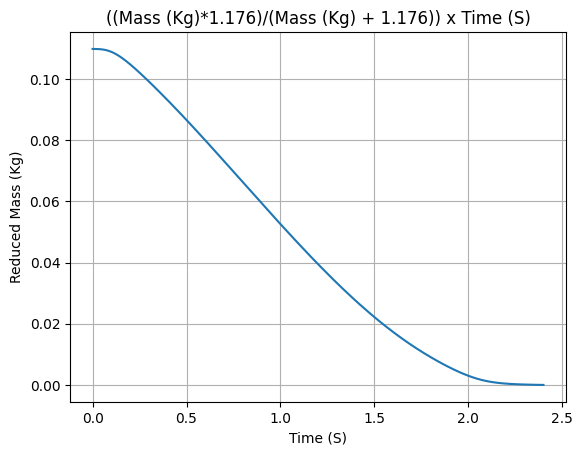


Aerodynamics Plots


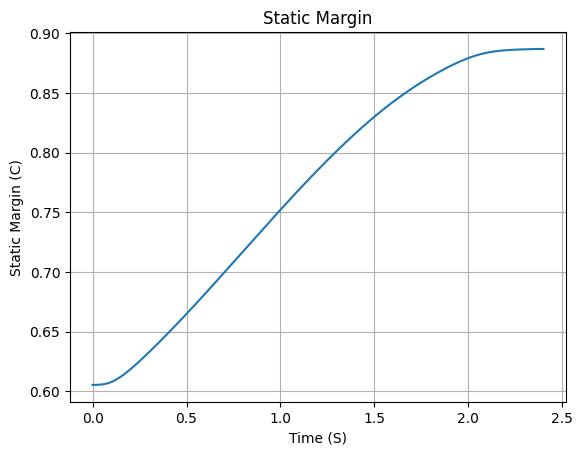

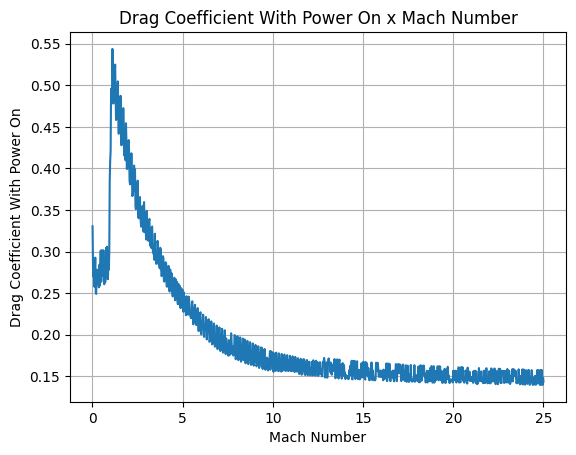

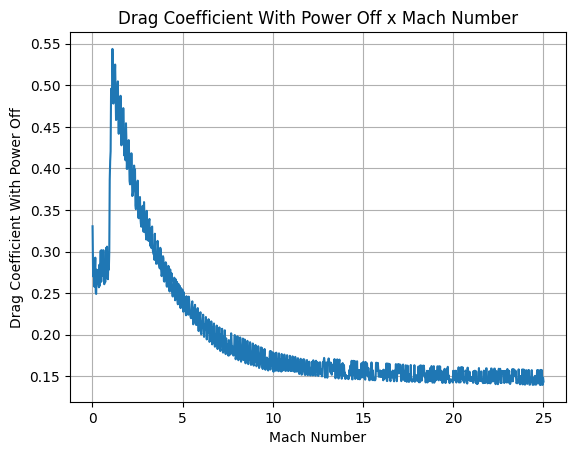

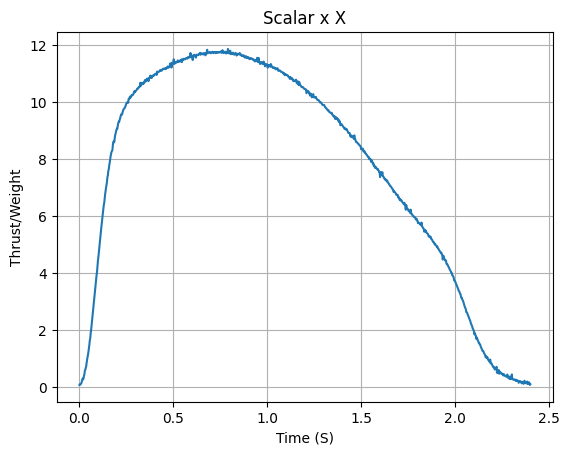

None


In [21]:
print(loc_iv.all_info())

In [22]:
#define main parachute on duplicate rocket

def main_trigger(p, h, y):
    # activate main when vz < 0 m/s and z < 800 m
    return True
loc_iv_chute = copy.deepcopy(loc_iv)
main = loc_iv_chute.add_parachute(
    name="main",
    cd_s=0.80,
    trigger=main_trigger,      # ejection altitude in meters
    sampling_rate=105,
    lag=0,
    noise=(0, 8.3, 0.5)

)

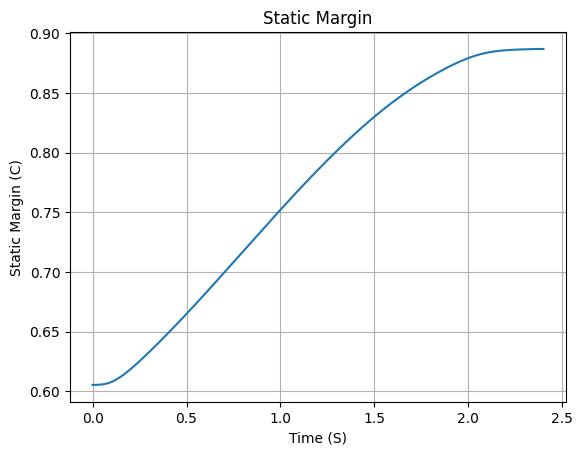

None


In [23]:
# Uncomment to plot and print the rocket's static margin
print(loc_iv.plots.static_margin())

In [24]:
# Uncomment to create a Flight object to simulate a rocket flight

test_flight = Flight(rocket=loc_iv, environment=env, rail_length=5.2, inclination=85, heading=0)



Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 212.88 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: 9.83 m/s
Lateral Surface Wind Speed: -1.54 m/s


Launch Rail

Launch Rail Length: 5.2  m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.441 s
Rail Departure Velocity: 29.186 m/s
Rail Departure Static Margin: 0.655 c
Rail Departure Angle of Attack: 19.479°
Rail Departure Thrust-Weight Ratio: 11.110
Rail Departure Reynolds Number: 2.103e+05


Burn out State

Burn out time: 2.400 s
Altitude at burn out: 208.180 m (AGL)
Rocket velocity at burn out: 129.772 m/s
Freestream velocity at burn out: 131.970 m/s
Mach Number at burn out: 0.391
Kinetic energy at burn out: 

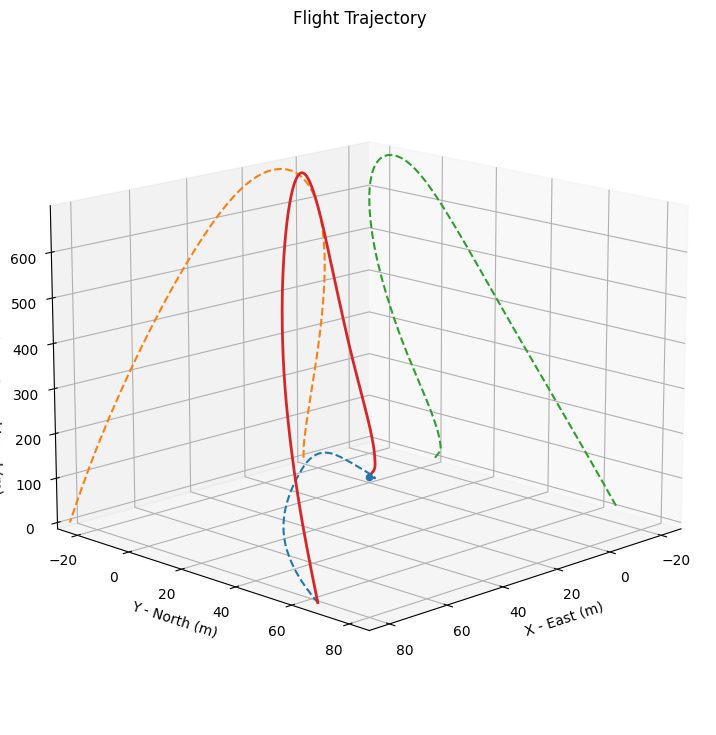



Trajectory Kinematic Plots



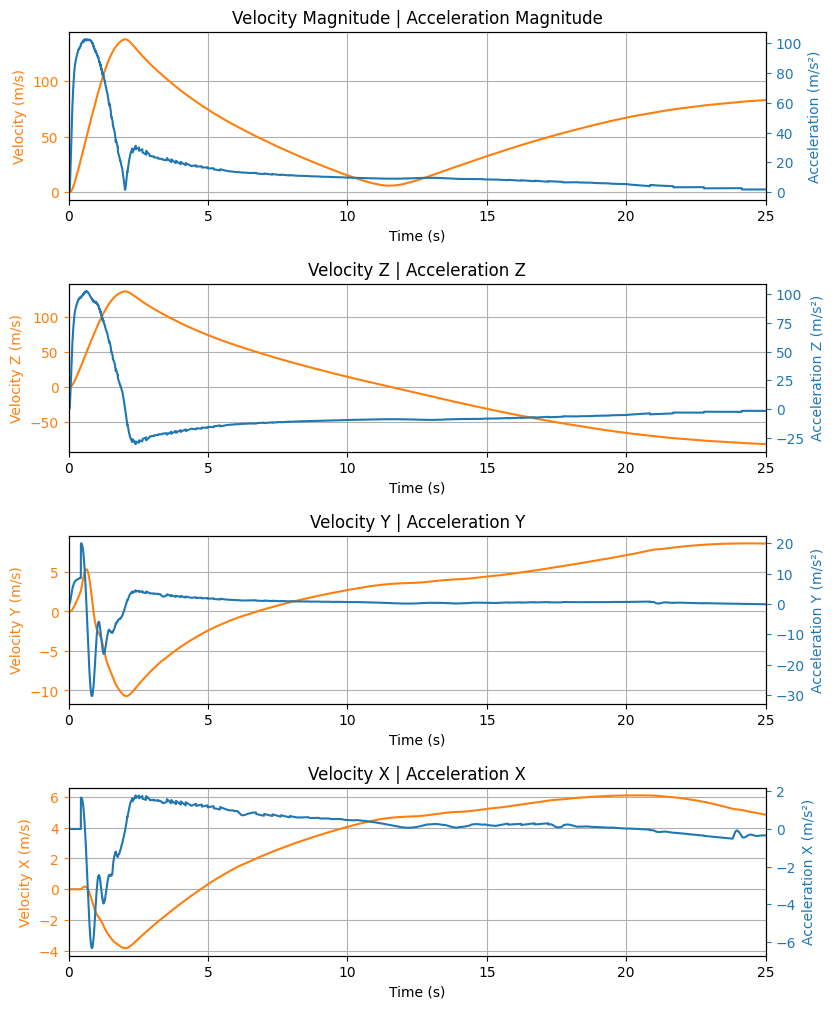



Angular Position Plots



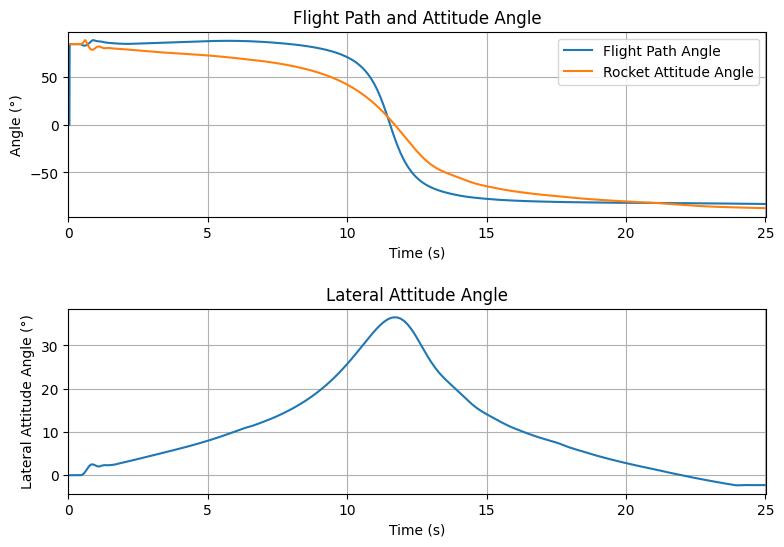



Path, Attitude and Lateral Attitude Angle plots



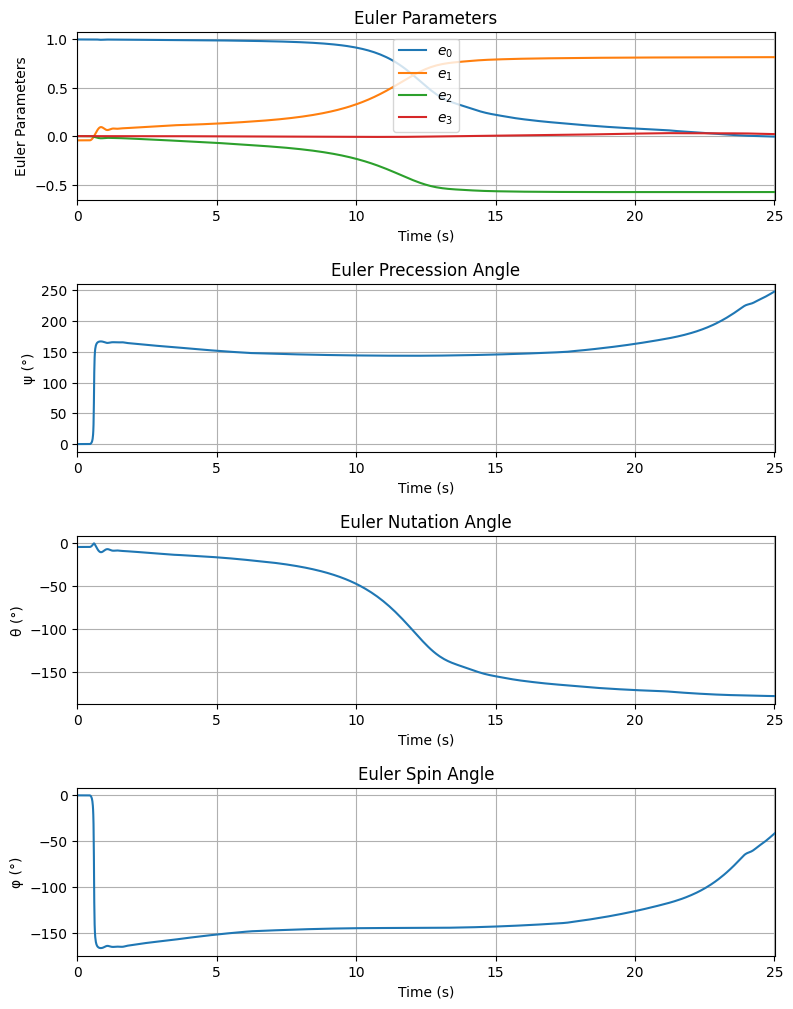



Trajectory Angular Velocity and Acceleration Plots



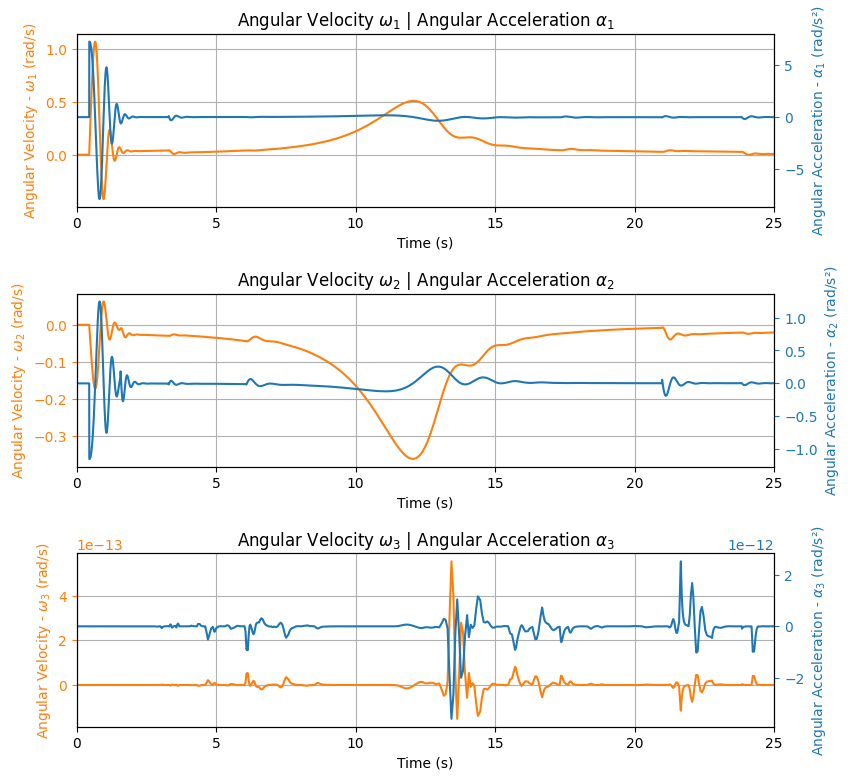



Aerodynamic Forces Plots



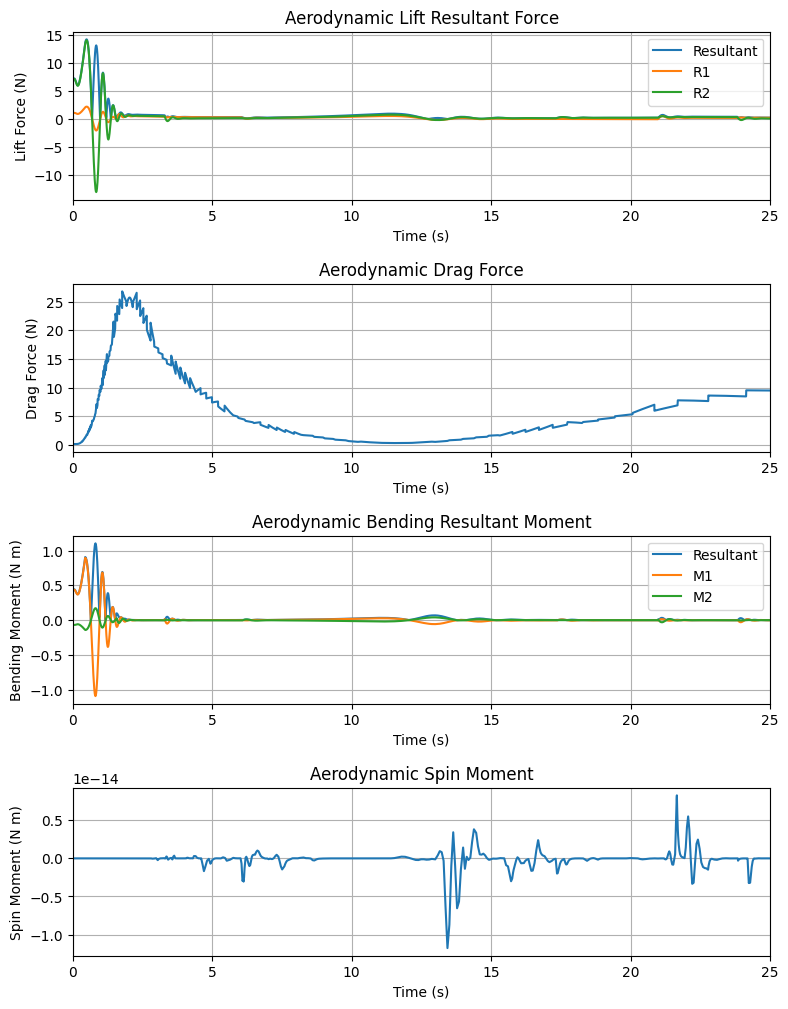



Rail Buttons Forces Plots



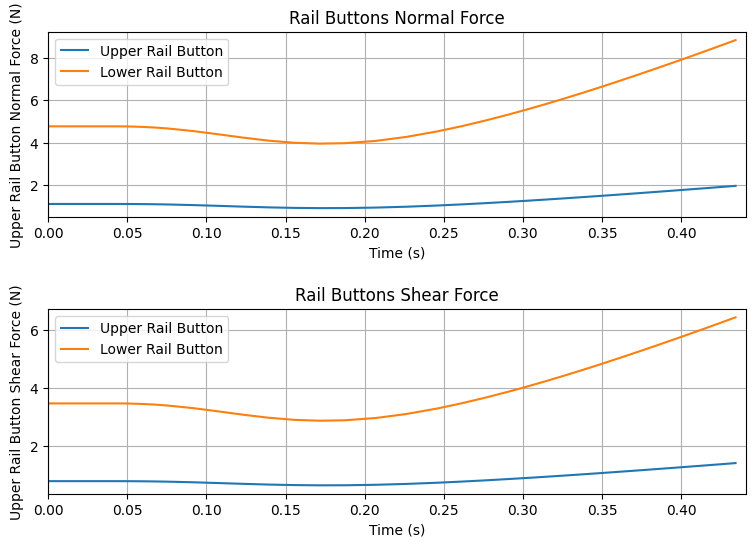



Trajectory Energy Plots



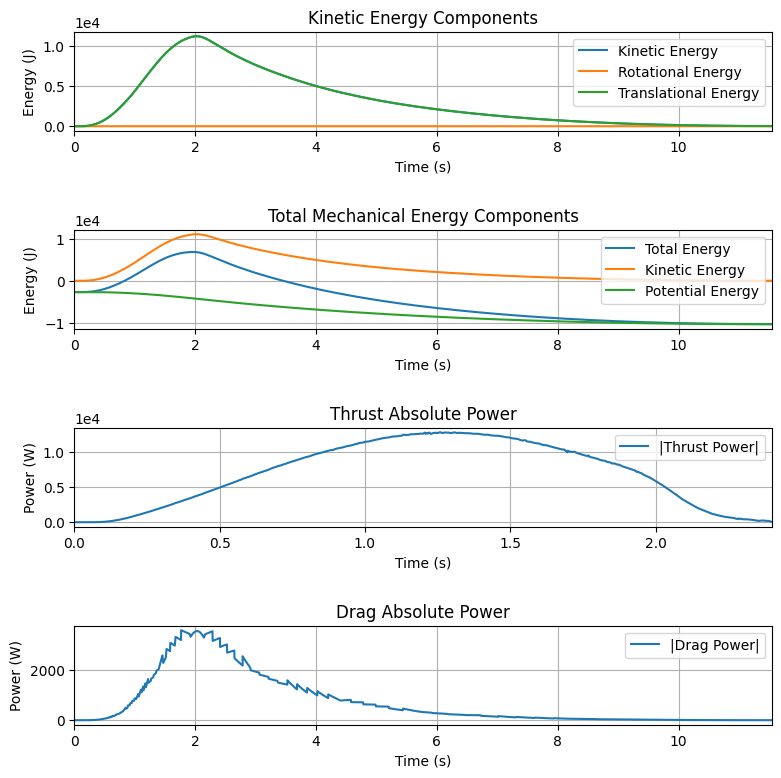



Trajectory Fluid Mechanics Plots



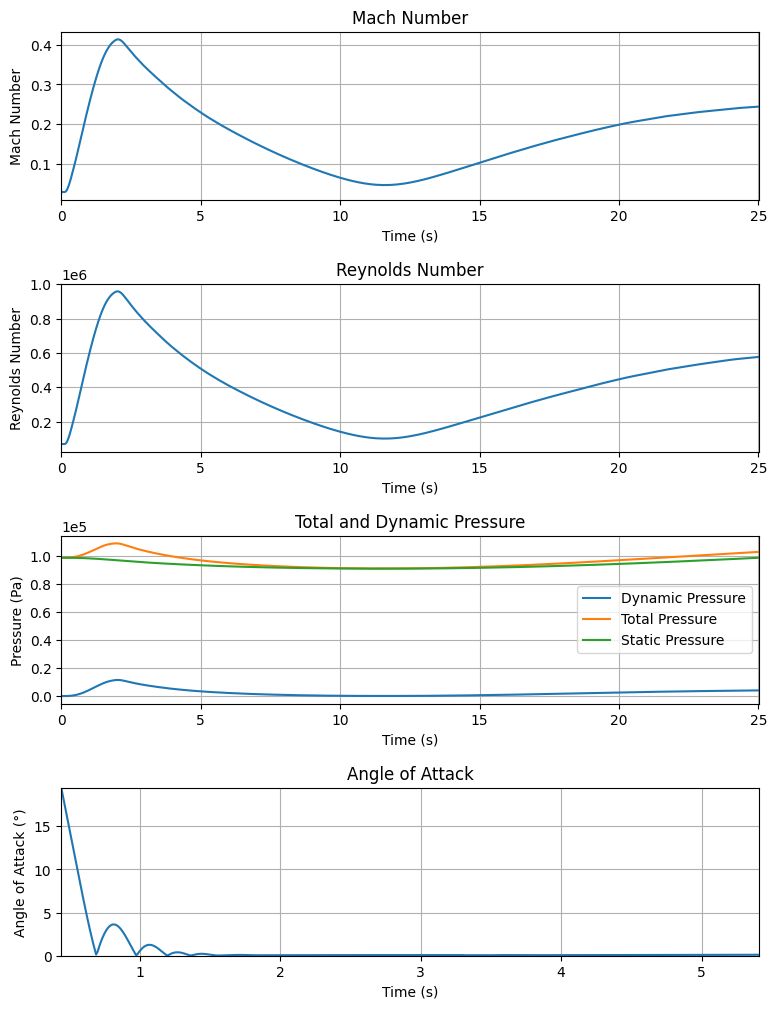



Trajectory Stability and Control Plots



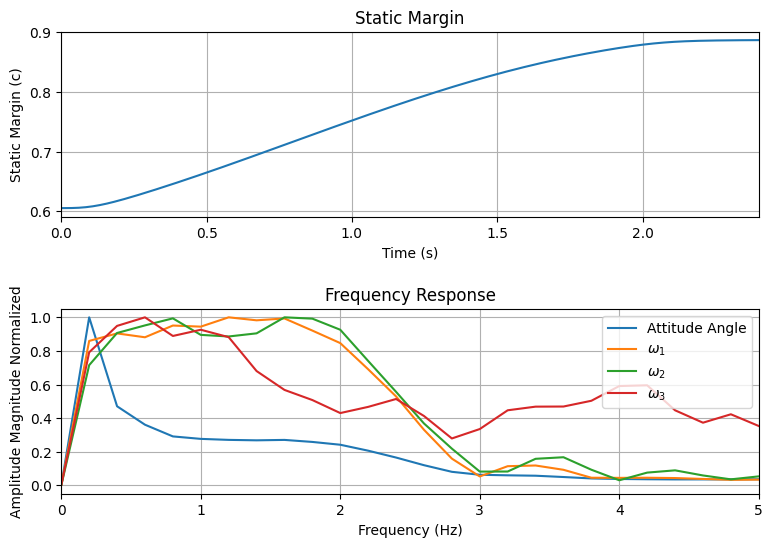



Rocket and Parachute Pressure Plots



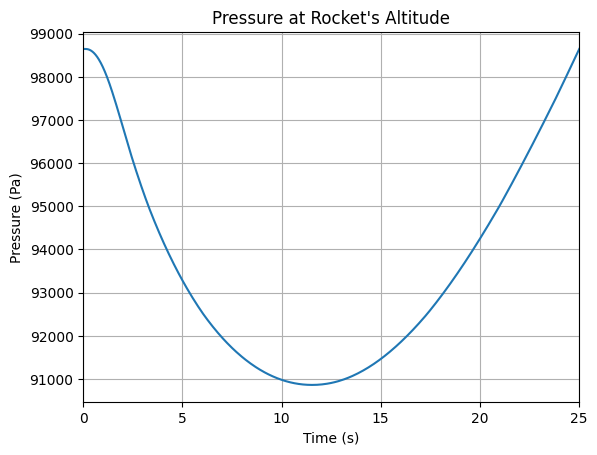


Rocket has no parachutes. No parachute plots available
None


In [26]:
# Uncomment to print all information about the simulated flight
print(test_flight.all_info())


In [25]:
# Notify that setup is complete
print("setup complete")


setup complete


In [27]:
import scipy.optimize as opt
import numpy as np


In [29]:
def simulate_flight(params):
    inclination, heading = params



In [28]:
#flight pre parachute deploy
phase1_flight = Flight(
        rocket=loc_iv,
        environment=env,
        rail_length=5.20,
        inclination=85.00,
        heading=0.00,
        #max_time=deploy_charge_time,
        max_time_step = .1
        #verbose = True
    )


In [30]:
initial_solution = [
        deploy_charge_time,
        phase1_flight.x(deploy_charge_time), phase1_flight.y(deploy_charge_time), phase1_flight.z(deploy_charge_time),
        phase1_flight.vx(deploy_charge_time), phase1_flight.vy(deploy_charge_time), phase1_flight.vz(deploy_charge_time),
        phase1_flight.e0(deploy_charge_time), phase1_flight.e1(deploy_charge_time), phase1_flight.e2(deploy_charge_time), phase1_flight.e3(deploy_charge_time),
        phase1_flight.w1(deploy_charge_time), phase1_flight.w2(deploy_charge_time), phase1_flight.w3(deploy_charge_time)
    ]


In [31]:
#flight post parachute deploy

test_flight = Flight(
        rocket=loc_iv_chute,
        environment=env,
        rail_length=5.20,
        inclination=85.00,
        heading=0.00,
        initial_solution=initial_solution

    )

In [35]:
launch_position = np.array([0, 1])
landing_position = np.array([test_flight.x_impact, test_flight.y_impact])

distance_from_rail = np.linalg.norm(launch_position - landing_position)

print(f'Inclination: {85:.2f}, Heading: {0:.2f}, Distance from Rail: {distance_from_rail:.2f}')



Inclination: 85.00, Heading: 0.00, Distance from Rail: 2216.41


In [36]:
distance_from_rail = np.linalg.norm(launch_position - landing_position)


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import scipy.optimize as opt
import scipy.interpolate as interp


In [37]:
# Get the number of cores (not threads)
num_cores = cpu_count() // 2  # Assumes hyper-threading is enabled


In [38]:
# Define the range of values for each parameter
inclination_values = np.linspace(60, 90, 15)  # 25 points between 40 and 90
heading_values = np.linspace(0, 360, 36)  # 36 points between 0 and 360

In [39]:
# Create an empty array to hold the objective function values
distance_from_rail_values = np.empty((len(inclination_values), len(heading_values)))


In [40]:
def evaluate_inclination(inclination):
    # Evaluate the objective function over all heading values for a given inclination
    results = np.empty(len(heading_values))
    for j, heading in enumerate(heading_values):
        params = [inclination, heading]
        results[j] = simulate_flight(params)
    return results

In [41]:
def plot_distance_from_rail(constant_heading, interpolated_function):
    # Ensure headings wrap around at 0 and 360 degrees
    headings = [(constant_heading + 360) % 360,
                (constant_heading + 5 + 360) % 360,
                (constant_heading - 5 + 360) % 360]

    plt.figure(figsize=(10, 8))

    for heading in headings:
        # Create arrays to hold the inclination values and corresponding distances
        inclinations = np.linspace(60, 85, 25)
        distances = np.empty_like(inclinations)

In [61]:
inclination=85.00,
heading=0.00,


In [62]:
 # Evaluate the interpolated function for each inclination at the current heading
for i, inclination in enumerate(inclination):
  params = np.array([heading, inclination])




<ipython-input-62-1a7655bfaae5>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  params = np.array([heading, inclination])


In [63]:
if __name__ == '__main__':
    # Use a Pool of workers to parallelize the outer loop
    with Pool(processes=num_cores) as pool:
        # The results will be a list of arrays, one array for each inclination value
        results_list = pool.map(evaluate_inclination, inclination_values)

In [64]:
 # Convert the list of arrays into a single 2D array
distance_from_rail_values = np.stack(results_list, axis=1)

In [65]:
# Create a meshgrid for plotting
heading_mesh, inclination_mesh = np.meshgrid(heading_values, inclination_values)


In [66]:
 # Create an interpolated function from the phase space data using RegularGridInterpolator
interpolated_function = interp.RegularGridInterpolator(
        (heading_values, inclination_values),
        distance_from_rail_values,
        method='cubic'
    )

In [67]:
def objective(params):
        # Objective function to be minimized
        return interpolated_function(params)


In [68]:
# Initial guess for optimization (middle of the parameter ranges)
initial_guess = [(heading_values[0] + heading_values[-1]) / 2, (inclination_values[0] + inclination_values[-1]) / 2]
bounds=[(heading_values[0], heading_values[-1]), (inclination_values[0], inclination_values[-1])]


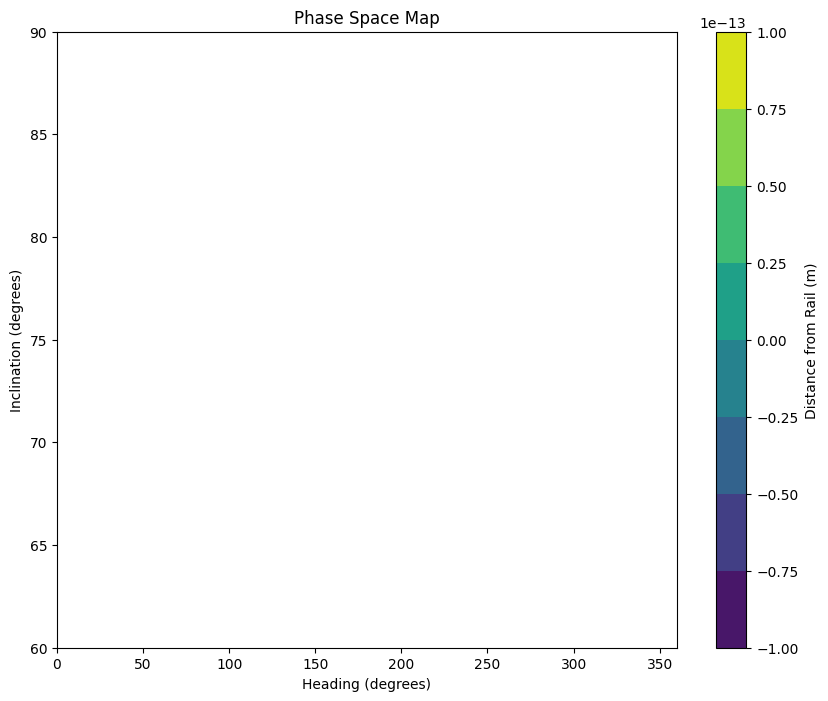

<Figure size 1000x800 with 0 Axes>

In [69]:
 # Plot the phase space map
plt.figure(figsize=(10, 8))
cp = plt.contourf(heading_mesh, inclination_mesh , np.transpose(distance_from_rail_values), cmap='viridis')
plt.colorbar(cp, label='Distance from Rail (m)')
plt.xlabel('Heading (degrees)')
plt.ylabel('Inclination (degrees)')
plt.title('Phase Space Map')
plt.show()

plot_distance_from_rail(90, interpolated_function)

In [70]:
import numpy as np

In [71]:
# Initial parameters
mass = 1.0  # kg
initial_velocity = 0.0  # m/s
thrust = 10.0  # N (constant thrust)
drag_coefficient = 0.1  # Example drag coefficient
g = 9.81  # m/s² (acceleration due to gravity)



In [72]:
# Simulation parameters
time_step = 0.01  # Time step for simulation (adjust as needed)
total_time = 10.0  # Total simulation time
num_steps = int(total_time / time_step)


In [73]:
# Initialize arrays to store data
time = np.zeros(num_steps)
velocity = np.zeros(num_steps)
position = np.zeros(num_steps)

In [74]:
# Initialize rocket state
current_velocity = initial_velocity
current_position = 0.0

In [75]:
# Simulation loop
for i in range(num_steps):
    # Calculate forces
    gravitational_force = mass * g
    drag_force = 0.5 * drag_coefficient * current_velocity**2
    net_force = thrust - gravitational_force - drag_force


In [76]:
    # Update velocity and position
    current_velocity += (net_force / mass) * time_step
    current_position += current_velocity * time_step


In [77]:
    # Store data
    time[i] = i * time_step
    velocity[i] = current_velocity
    position[i] = current_position

# Plot the results or analyze the data as needed


This code sets up a simple simulation of a rocket with a constant thrust and drag force. You can extend this simulation to include more complex physics, such as air resistance at higher altitudes or variable thrust. Additionally, you can visualize the rocket's motion by plotting the data obtained during the simulation using a library like Matplotlib.